# Data Exploration

In [1]:
import logging as lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lg.basicConfig(filename="test1.log",level=lg.INFO,format='%(asctime)s %(message)s %(name)s %(levelname)s')
lg.info("we are inside the info main log")
lg.error("we are inside the error main log")
lg.warning("we are inside the warning main log")

In [6]:
try:
    lg.info("watching dataframe")
    data=pd.read_csv("mushrooms.csv")
    print(data)
except Exception as e:
    lg.exception(str(e))

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [7]:
lg.info("a quick look at data entries")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
lg.info("checking for shape and null values")
data.shape
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

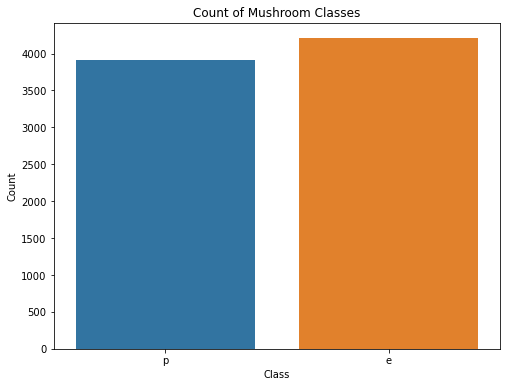

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class')
plt.title("Count of Mushroom Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()





# Feature Engineering


In [13]:

    lg.info("changing categorical values into numerical values by using level and coder method")
    try:
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        for col in data.columns:
            data[col] = label_encoder.fit_transform(data[col])
    except Exception as e:
        lg.exception(e)
        print(e)
    
 

In [16]:
# Split the data into features (X) and labels (y)
X = data.drop('class', axis=1)
y = data['class']


# Model Building

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into training and testing sets
lg.info("spliting data set")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,7,2,0,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,3,7,7,0,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,4


In [20]:
y_train

7873    1
6515    1
6141    1
2764    0
438     0
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class, Length: 6499, dtype: int64

In [21]:
lg.info("Creating and training a Random Forest classifier")
rf_clf = RandomForestClassifier(max_depth = 5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
lg.info("creating prediction column ")
y_pred = rf_clf.predict(X_test)

In [23]:
lg.info("getting prediction report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [24]:
lg.info("seeking important features of dataset")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [25]:
print("Top 5 important features:")
print(feature_importances.head(5))

Top 5 important features:
              Feature  Importance
4                odor    0.166229
8          gill-color    0.144516
7           gill-size    0.105095
18          ring-type    0.083560
19  spore-print-color    0.073769


In [26]:
lg.info("Creating and training a Logistic Regression classifier")
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

C:\Users\Anshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:

lg.info("Creating and training a Decision Tree classifier")
dt_clf = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [29]:
lg.info("training adaboost clf taking decision tree clf as base estimator")

In [30]:
adb_clf = AdaBoostClassifier(base_estimator= dt_clf, n_estimators= 400, learning_rate = 1)

In [31]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=0),
                   learning_rate=1, n_estimators=400)

# Model Testing

In [32]:
from sklearn.metrics import accuracy_score



In [33]:
try:
    lg.info(" Making predictions on the test set using each classifier")
    rf_predictions = rf_clf.predict(X_test)
    lr_predictions = lr_clf.predict(X_test)
    dt_predictions = dt_clf.predict(X_test)
    adb_predictions= adb_clf.predict(X_test)
except Exception as e:
    lg.exception(e)
    print(e)

In [34]:
lg.info("Calculating accuracies of each classifier")
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
adb_accuracy = accuracy_score(y_test, adb_predictions)
# Comparing the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("adaptive boosting accuracy:", adb_accuracy)

Random Forest Accuracy: 0.9907692307692307
Logistic Regression Accuracy: 0.947076923076923
Decision Tree Accuracy: 0.9766153846153847
adaptive boosting accuracy: 1.0


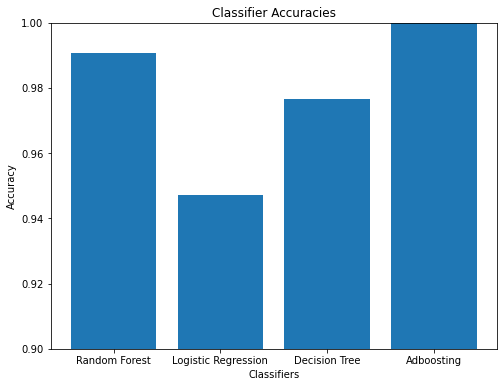

In [35]:
lg.info("Defining the classifiers and plotting accuracies")
classifiers = ['Random Forest', 'Logistic Regression', 'Decision Tree','Adboosting']
accuracies = [rf_accuracy, lr_accuracy, dt_accuracy,adb_accuracy]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies)
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()